In [39]:
import pandas as pd

price_map = {
    "Lowfat Milk": 0.49,
    "Whole Milk": 0.44,
    "Apple Pie": 0.63,
    "Apple Raw w/Skin": 0.53,
    "Bagels": 0.37,
    "Banana": 0.42,
    "Bean Bacon Soup": 1.58,
    "Bologna Turkey": 0.52,
    "Butter Regular": 0.33,
    "Cap'N Crunch": 0.47,
    "Carrots Raw": 0.33,
    "Celery Raw": 0.28,
    "Cheddar Cheese": 0.86,
    "Cheerios": 0.42,
    "Chicken Noodle Soup": 1.63,
    "Chocolate Chip Cookies": 0.47,
    "Corn Flakes Kellogg'S": 0.43,
    "Couscous": 0.63,
    "Crm Mshrm Soup": 1.53,
    "Frankfurter Beef": 0.88,
    "Frozen Broccoli": 0.91,
    "Frozen Corn": 0.47,
    "Grapes": 0.53,
    "Ham Sliced Extralean": 0.63,
    "Hamburger w/Toppings": 4.17,
    "Hotdog Plain": 2.07,
    "Kielbasa Pork": 0.52,
    "Kiwifruit Raw Fresh": 0.52,
    "Lettuce Iceberg Raw": 0.32,
    "Macaroni cooked": 0.64,
    "Malt-O-Meal Choc": 1.01,
    "New Eng Clam Chwd": 1.57,
    "New Eng Clam Chwd w/Mlk": 1.51,
    "Oatmeal": 1.03,
    "Oatmeal Cookies": 0.42,
    "Oranges": 0.42,
    "Peanut Butter": 0.47,
    "Peppers Sweet Raw": 0.71,
    "Pizza w/Pepperoni": 2.05,
    "Poached Eggs": 0.38,
    "Popcorn Air-Popped": 0.38,
    "Pork": 1.38,
    "Potato Chips": 0.64,
    "Potatoes Baked": 0.48,
    "Pretzels": 0.52,
    "Raisin Bran Kellogg'S": 0.59,
    "Rice Krispies": 0.48,
    "Roasted Chicken": 3.82,
    "Sardines in Oil": 1.15,
    "Scrambled Eggs": 0.37,
    "Skim Milk": 0.48,
    "Spaghetti W/ Sauce": 2.54,
    "Special K": 0.48,
    "Splt Pea&Ham Soup": 1.63,
    "Tofu": 0.92,
    "Tomato Red Ripe Raw": 0.37,
    "Tomato Soup": 1.27,
    "Tortilla Chips": 0.63,
    "Veggie Beef Soup": 1.56,
    "Wheat Bread": 0.38,
    "White Bread": 0.33,
    "White Rice": 0.57,
    "White Tuna in Water": 1.77,
}

# === actualizar archivo ===
df = pd.read_csv("diet_with_prices.csv")

# eliminamos precios anteriores si existen
if "Price" in df.columns:
    df.drop(columns=["Price"], inplace=True)

# asignamos nuevos precios según diccionario
df["Price"] = df["Name"].map(price_map)

# guardar
df.to_csv("diet_with_prices.csv", index=False)

print("✔ Precios actualizados en diet_with_prices.csv")

✔ Precios actualizados en diet_with_prices.csv


62 alimentos cargados.
gen	nevals	min        	avg       
0  	1000  	9.56651e+06	2.2289e+07


C:\Users\mvall\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\mvall\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


1  	835   	8.12915e+06	1.8441e+07
2  	808   	6.4166e+06 	1.52175e+07
3  	842   	5.58896e+06	1.27028e+07
4  	830   	4.52927e+06	1.05341e+07
5  	838   	2.78536e+06	8.72488e+06
6  	822   	2.78536e+06	7.18714e+06
7  	861   	1.89223e+06	5.86683e+06
8  	846   	1.64467e+06	4.84332e+06
9  	819   	1.40118e+06	3.9944e+06 
10 	843   	1.03131e+06	3.31265e+06
11 	854   	557991     	2.7072e+06 
12 	815   	351381     	2.11893e+06
13 	819   	255663     	1.60169e+06
14 	842   	54592.9    	1.18263e+06
15 	839   	38471      	842852     
16 	881   	11742.1    	576999     
17 	850   	4580.29    	370810     
18 	815   	8122.04    	239884     
19 	834   	5092.49    	152860     
20 	835   	3182.88    	115237     
21 	828   	2985.46    	88104.1    
22 	812   	2982.3     	73294.4    
23 	855   	2982.3     	58111.5    
24 	826   	2982.26    	41752.8    
25 	805   	2985.46    	34286.3    
26 	870   	2781.5     	31719.5    
27 	858   	2583.06    	27754.5    
28 	854   	2503.68    	20937.7    
29 	837   	2483.63   

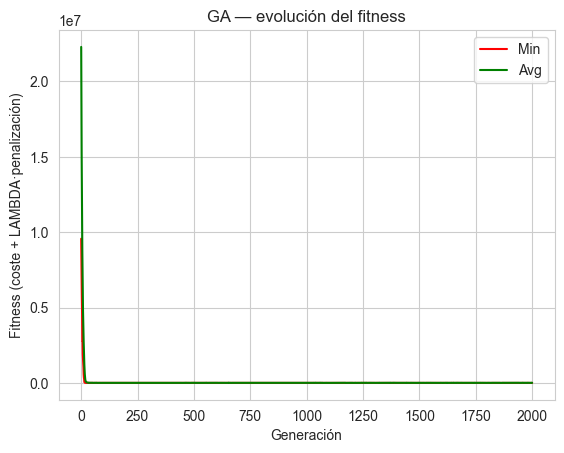

In [40]:
import random
import numpy 
import csv
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Parámetros del problema
# ==========================

CSV_FILE = "diet_with_prices.csv"
MAX_PORTION = 7           # porciones enteras permitidas
LAMBDA = 100              # peso de la penalización frente al coste

# Rangos de nutrientes semanales
NUTRIENT_BOUNDS = {
    # Energía y macros (semana)
    "Calories":        (14000.0, 17500.0),   # 2000–2500 kcal/día

    # Lípidos y sodio
    "Cholesterol":     (0.0,    2100.0),     # ~300 mg/día máx clásico
    "Total_Fat":       (300.0,  650.0),      # 20–35 % de kcal semanales aprox.
    "Sodium":          (0.0,    16000.0),    # <2300 mg/día ≈ 16100 mg/sem

    # Carbohidratos, fibra y proteína
    "Carbohydrates":   (1500.0, 2600.0),     # 45–65 % de kcal/sem
    "Dietary_Fiber":   (140.0,  280.0),      # ~20–40 g/día; adaptado al dataset
    "Protein":         (350.0,  700.0),      # ~50–100 g/día

    # Vitaminas (µg/mg a la semana)
    "Vit_A":           (5000.0, 20000.0),    # 700–900 µg/día; UL ~3000 µg/día
    "Vit_C":           (500.0,  7000.0),     # ~70–100 mg/día; límite prudente

    # Minerales (mg/sem)
    "Calcium":         (4900.0, 10500.0),    # 700 mg/día RDA; máx prudente
    "Iron":            (60.0,   280.0),      # ~8–18 mg/día; UL ~40 mg/día
}

# Clasificación fija de los 62 alimentos en tipos
CATEGORY_MAP = {
    "Frozen Broccoli":        "veg",
    "Carrots Raw":            "veg",
    "Celery Raw":             "veg",
    "Frozen Corn":            "veg",
    "Lettuce Iceberg Raw":    "veg",
    "Peppers Sweet Raw":      "veg",
    "Tomato Red Ripe Raw":    "veg",

    "Potatoes Baked":         "carb",
    "Bagels":                 "carb",
    "Wheat Bread":            "carb",
    "White Bread":            "carb",
    "Cap'N Crunch":           "carb",
    "Cheerios":               "carb",
    "Corn Flakes Kellogg'S":  "carb",
    "Raisin Bran Kellogg'S":  "carb",
    "Rice Krispies":          "carb",
    "Special K":              "carb",
    "Oatmeal":                "carb",
    "Couscous":               "carb",
    "Macaroni cooked":        "carb",

    "Apple Raw w/Skin":       "fruit",
    "Banana":                 "fruit",
    "Grapes":                 "fruit",
    "Kiwifruit Raw Fresh":    "fruit",
    "Oranges":                "fruit",

    "Tofu":                   "legume",
    "Peanut Butter":          "legume",

    "Butter Regular":         "dairy",
    "Cheddar Cheese":         "dairy",
    "Whole Milk":             "dairy",
    "Lowfat Milk":            "dairy",
    "Skim Milk":              "dairy",

    "Roasted Chicken":        "meat",
    "Poached Eggs":           "meat",
    "Scrambled Eggs":         "meat",
    "Bologna Turkey":         "meat",
    "Frankfurter Beef":       "meat",
    "Ham Sliced Extralean":   "meat",
    "Kielbasa Pork":          "meat",
    "Pork":                   "meat",

    "Sardines in Oil":        "fish",
    "White Tuna in Water":    "fish",

    "Pizza w/Pepperoni":      "prepared",
    "Hamburger w/Toppings":   "prepared",
    "Hotdog Plain":           "prepared",
    "Spaghetti W/ Sauce":     "prepared",

    "Oatmeal Cookies":        "sweet",
    "Apple Pie":              "sweet",
    "Chocolate Chip Cookies": "sweet",
    "Malt-O-Meal Choc":       "sweet",

    "Popcorn Air-Popped":     "snack",
    "Potato Chips":           "snack",
    "Pretzels":               "snack",
    "Tortilla Chips":         "snack",

    "Chicken Noodle Soup":    "soup",
    "Splt Pea&Ham Soup":      "soup",
    "Veggie Beef Soup":       "soup",
    "New Eng Clam Chwd":      "soup",   # aparece dos veces en el CSV
    "Tomato Soup":            "soup",
    "Crm Mshrm Soup":         "soup",
    "Bean Bacon Soup":        "soup",
}

# Rangos de raciones semanales por tipo
CATEGORY_BOUNDS = {
    "veg":     (14, 28),   # 2–5 raciones de verdura/día
    "fruit":   (7, 21),    # 1–3 frutas/día
    "carb":    (7, 21),    # 1–3 raciones cereales/tubérculos/día
    "legume":  (2, 5),     # 2–5 platos de legumbre/sem
    "dairy":   (5, 11),    # 1–2 lácteos/día

    "meat":    (3, 7),     # 3-7 carne/huevo/sem
    "fish":    (3, 7),     # 3-7 pescados/sem

    "prepared": (0, 2),     # pizza/hamburguesa/hotdog/spaghetti sauce
    "snack":    (0, 2),     # snacks salados
    "sweet":    (0, 3),     # dulces/cereales azucarados

    "soup":     (0, 5),     # hasta 1 sopa/día
}

POPULATION_SIZE = 1000
P_CROSSOVER = 0.8
P_MUTATION = 0.2
MAX_GENERATIONS = 2000
HALL_OF_FAME_SIZE = 10

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

FOODS = None
NUTRIENT_NAMES = list(NUTRIENT_BOUNDS.keys())


# ==========================
# Utilidades
# ==========================

def load_foods(csv_file, nutrient_bounds):
    foods = []
    with open(csv_file, newline="", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            name = row["Name"]
            food = {
                "Name": name,
                "Price": float(row["Price"]),
                "Category": CATEGORY_MAP[name],
            }
            for nut in nutrient_bounds.keys():
                food[nut] = float(row[nut])
            foods.append(food)
    return foods


# ==========================
# Fitness (forma original: coste + LAMBDA * penalización)
# ==========================

def diet_fitness(individual):
    foods = FOODS
    cost = 0.0
    totals = {nut: 0.0 for nut in NUTRIENT_NAMES}
    cat_totals = {cat: 0.0 for cat in CATEGORY_BOUNDS.keys()}

    # Sumar nutrientes y raciones por tipo
    for qty, food in zip(individual, foods):
        cost += qty * food["Price"]
        for nut in NUTRIENT_NAMES:
            totals[nut] += qty * food[nut]

        cat = food["Category"]
        if cat in cat_totals:
            cat_totals[cat] += qty

    penalty = 0.0

    # Penalización por nutrientes
    for nut, (mn, mx) in NUTRIENT_BOUNDS.items():
        v = totals[nut]
        if v < mn:
            penalty += (mn - v)
        elif v > mx:
            penalty += (v - mx)

    # Penalización por patrón de dieta (raciones por tipo)
    for cat, (mn, mx) in CATEGORY_BOUNDS.items():
        v = cat_totals[cat]
        if v < mn:
            penalty += (mn - v)
        elif v > mx:
            penalty += (v - mx)

    # Forma original: coste + LAMBDA * penalización
    energy = cost + LAMBDA * penalty
    return (energy,)


# ==========================
# Operadores GENÉTICOS → ENTEROS
# ==========================

def mutAddInteger(individual, indpb):
    """Suma/resta 1 unidad a un gen con probabilidad indpb."""
    for i in range(len(individual)):
        if random.random() < indpb:
            delta = random.choice([-1, 1])
            individual[i] = max(0, min(MAX_PORTION, individual[i] + delta))
    return individual,


# ==========================
# Main
# ==========================

def main():
    global FOODS
    FOODS = load_foods(CSV_FILE, NUTRIENT_BOUNDS)
    n_foods = len(FOODS)
    print(f"{n_foods} alimentos cargados.")

    toolbox.register("attrInt", random.randint, 0, MAX_PORTION)
    toolbox.register("individualCreator", tools.initRepeat, creator.Individual,
                     toolbox.attrInt, n_foods)
    toolbox.register("populationCreator", tools.initRepeat, list,
                     toolbox.individualCreator)

    toolbox.register("evaluate", diet_fitness)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", mutAddInteger, indpb=1.0 / n_foods)

    population = toolbox.populationCreator(n=POPULATION_SIZE)
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", numpy.min)
    stats.register("avg", numpy.mean)

    population, logbook = algorithms.eaSimple(
        population,
        toolbox,
        cxpb=P_CROSSOVER,
        mutpb=P_MUTATION,
        ngen=MAX_GENERATIONS,
        stats=stats,
        halloffame=hof,
        verbose=True
    )

    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    best = hof[0]

    cost = 0.0
    totals = {nut: 0.0 for nut in NUTRIENT_NAMES}
    cat_totals = {cat: 0.0 for cat in CATEGORY_BOUNDS.keys()}

    for qty, food in zip(best, FOODS):
        cost += qty * food["Price"]
        for nut in NUTRIENT_NAMES:
            totals[nut] += qty * food[nut]
        cat_totals[food["Category"]] += qty

    print("\n📌 Mejor valor energía (coste + LAMBDA·penalización):", best.fitness.values[0])
    print("💰 Coste real:", cost)

    print("\n🔍 Nutrientes totales:")
    for nut, (mn, mx) in NUTRIENT_BOUNDS.items():
        print(f"  {nut}: {totals[nut]:.2f}  (mín {mn} – máx {mx})")

    print("\n🥗 Raciones por tipo:")
    for cat, (mn, mx) in CATEGORY_BOUNDS.items():
        print(f"  {cat}: {cat_totals[cat]:.2f}  (mín {mn} – máx {mx})")

    print("\n🥗 Dieta obtenida:")
    for qty, food in zip(best, FOODS):
        if qty > 0:
            print(f"  {food['Name']}: {qty} porciones")

    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red', label='Min')
    plt.plot(meanFitnessValues, color='green', label='Avg')
    plt.legend()
    plt.title("GA — evolución del fitness")
    plt.xlabel("Generación")
    plt.ylabel("Fitness (coste + LAMBDA·penalización)")
    plt.show()


if __name__ == "__main__":
    main()